## 📈 Analyzing Stock Performances

This notebook provides technical analysis for multiple stocks using interactive Plotly charts and indicators RSI, MACD, Bollinger Bands, and Moving Averages.


### ✅ Setup


In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

/Users/sevalbozkurt/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/sevalbozkurt/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 📊 Define functions to calculate the indicators RSI, MACD

In [3]:
# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate the MACD
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    # Calculate the short-term EMA
    short_ema = df['Close'].ewm(span=short_window,adjust=False).mean() 
    #Calculate the long-term EMA
    long_ema = df['Close'].ewm(span=long_window, adjust=False).mean() 
    #Calculate the MACD line
    macd = short_ema - long_ema 
    #Calculate the signal line
    signal = macd.ewm(span = signal_window, adjust=False).mean() 
    return macd , signal


### Define function to generate buy sell trading signals 

In [4]:
# Function to generate trading signals
def generate_signals(df):
    buy_signals = []
    sell_signals = []
    for i in range(len(df)):
        if df['RSI'].iloc[i] < 40 and df['MACD'].iloc[i] > df['Signal'].iloc[i]:
            buy_signals.append(df['Close'].iloc[i])
            sell_signals.append(np.nan)
        elif df['RSI'].iloc[i] > 60 and df['MACD'].iloc[i] < df['Signal'].iloc[i]:
            buy_signals.append(np.nan)
            sell_signals.append(df['Close'].iloc[i])
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)
    return buy_signals, sell_signals


### 🔍 Run Analysis for Each Stock

In [18]:
# Yahoo Finance Tickers
tickers = [
#     'NVDA',     # NVIDIA
#     'F',        # Ford Motor
#     'MSFT',     # Microsoft
#     'O',        # Realty Income
  'NN.AS',    # NN Group
#     'SHELL.AS',  # Shell
#     'PG',       # Procter & Gamble
#     'PFE',      # Pfizer
 'ASRNL.AS', # ASR Nederland
#     'THYAO.IS', # THY 
#     'VZ',       #Verizon
#     'XOM',
#     'JNJ', # Johnson & Johnson
#     'UL', # Unilever,
#     'TMSN.IS',
#     'MRGYO.IS',
#     'PNLSN.IS',
    'AKSEN.IS',
    'ETH-USD'
    
]


📊 Processing NN.AS...


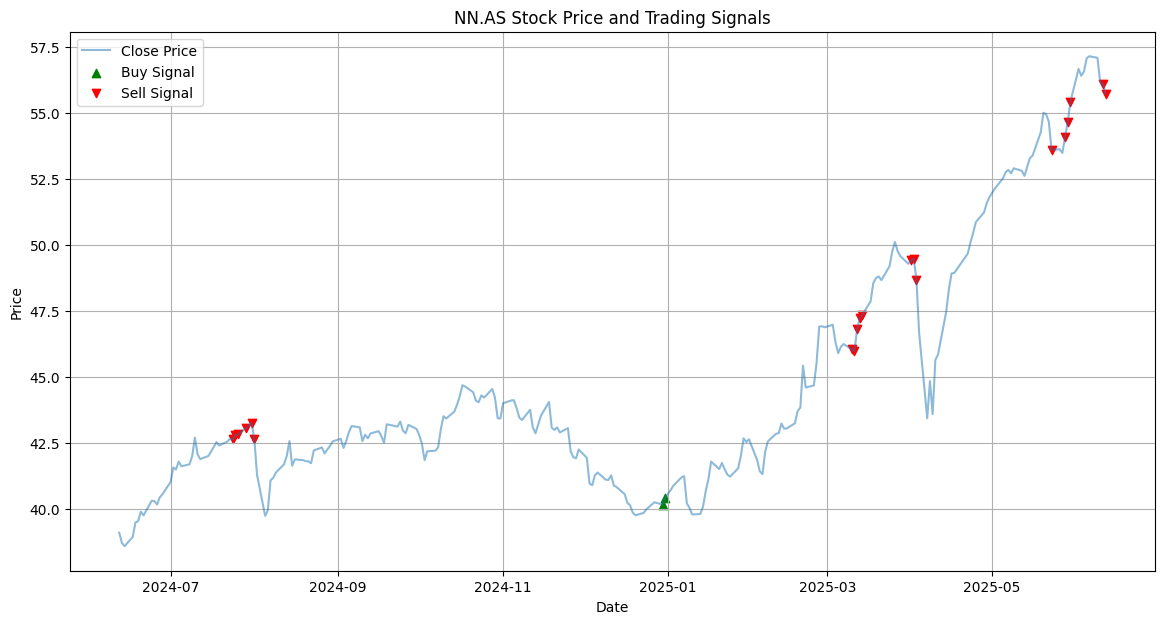


📊 Processing AKSEN.IS...


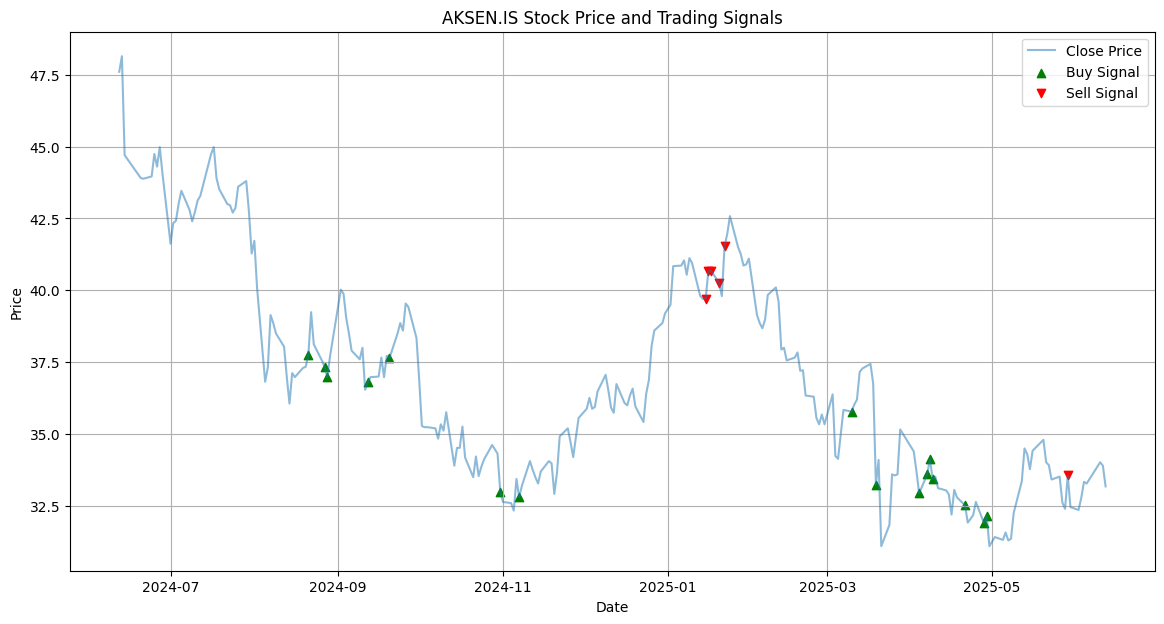


📊 Processing ETH-USD...


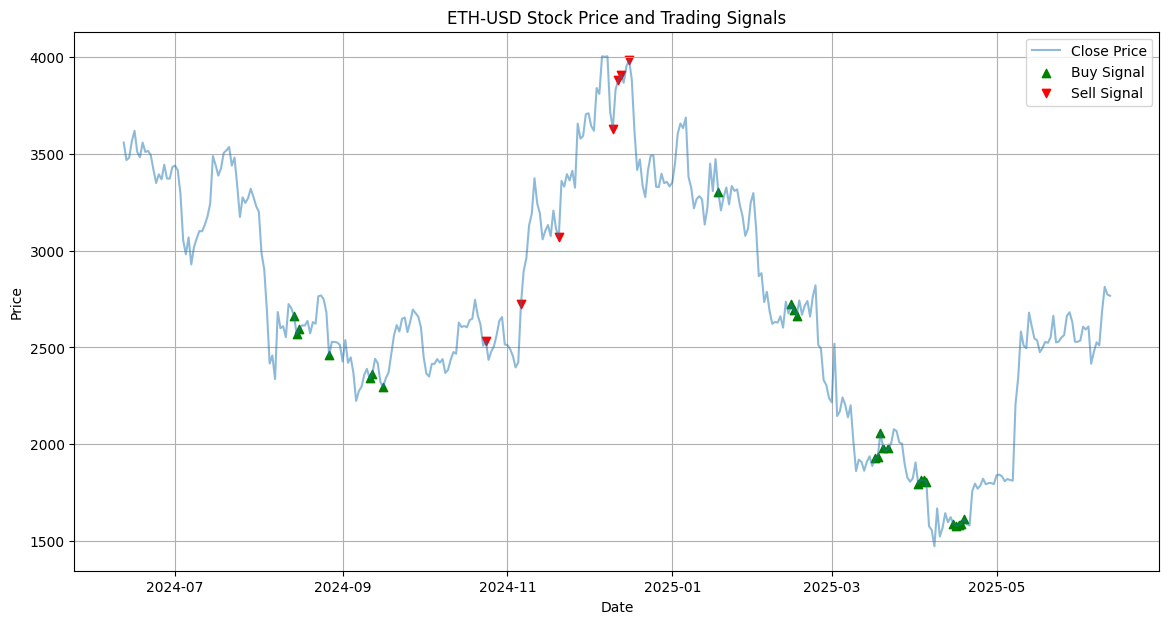

In [16]:
# === Loop Over Tickers ===
for ticker in tickers:
    print(f"\n📊 Processing {ticker}...")

    df = yf.Ticker(ticker).history(period='1y')

    if df.empty or len(df) < 60:
        print(f"⚠️ Skipping {ticker}: not enough data.")
        continue

    df['RSI'] = calculate_rsi(df)
    df['MACD'], df['Signal'] = calculate_macd(df)
    df['Buy_Signal'], df['Sell_Signal'] = generate_signals(df)

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price', alpha=0.5)
    plt.scatter(df.index, df['Buy_Signal'], label='Buy Signal', marker='^', color='green')
    plt.scatter(df.index, df['Sell_Signal'], label='Sell Signal', marker='v', color='red')
    plt.title(f'{ticker} Stock Price and Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

### 📊 Interactive Charts

In [20]:
# === Loop and Plot with Plotly ===
for ticker in tickers:
    print(f"\n📊 Analyzing {ticker}...")

    df = yf.Ticker(ticker).history(period='1y')

    if df.empty or len(df) < 60:
        print(f"⚠️ Skipping {ticker}: not enough data.")
        continue

    df['RSI'] = calculate_rsi(df)
    df['MACD'], df['Signal'] = calculate_macd(df)
    df['Buy_Signal'], df['Sell_Signal'] = generate_signals(df)
   
    # Calculate Bollinger Bands
    df['SMA'] = df['Close'].rolling(window=20).mean()
    df['SD'] = df['Close'].rolling(window=20).std()
    df['UB'] = df['SMA'] + 2 * df['SD']
    df['LB'] = df['SMA'] - 2 * df['SD']

    # Interactive Plotly chart
    fig = go.Figure()

    # Close Price
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], name='Close Price', line=dict(color='lightgray')))

    # Buy Signals
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['Buy_Signal'],
        mode='markers',
        marker=dict(symbol='triangle-up', color='green', size=10),
        name='Buy Signal'
    ))

    # Sell Signals
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['Sell_Signal'],
        mode='markers',
        marker=dict(symbol='triangle-down', color='red', size=10),
        name='Sell Signal'
    ))

    fig.update_layout(
        title=f'{ticker} Stock Price with RSI + MACD Trading Signals',
        xaxis_title='Date',
        yaxis_title='Price',
        height=600,
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    
    # Bollinger Bands
    fig.add_trace(go.Scatter(x=df.index, y=df['UB'], mode='lines', name='Upper Bollinger Band', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df.index, y=df['LB'], mode='lines', name='Lower Bollinger Band', line=dict(color='green'), fill='tonexty'))
    fig.add_trace(go.Scatter(x=df.index, y=df['SMA'], mode='lines', name='Middle Bollinger Band', line=dict(color='blue')))

    # Layout
    fig.update_layout(title=f'{ticker} Stock Price with Bollinger Bands',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  showlegend=True)


    fig.show()


📊 Analyzing NN.AS...



📊 Analyzing ASRNL.AS...



📊 Analyzing AKSEN.IS...



📊 Analyzing ETH-USD...


#### Interpreting Bollinger Bands

When the price moves close to the upper band (UB), it may indicate overbought conditions, suggesting a potential price reversal to the downside.

Conversely, when the price approaches the lower band (LB), it may indicate oversold conditions, suggesting a potential price reversal to the upside.

The middle band (MA) represents the average price over the specified period and can serve as a reference point.

Look for price crossovers of the bands or significant price deviations from the bands as potential trading signals.

### USD vs. EUR-adjusted Prices

In [8]:
def plot_stock_in_eur(ticker, start_date='2025-01-01'):
    """
    Interactive plot of stock price in USD vs converted to EUR using FX rate.
    """
    # Download data
    data = yf.download([ticker, 'EURUSD=X'], start=start_date, group_by='ticker')

    # Extract close prices
    stock_close = data[ticker]['Close']
    eurusd_close = data['EURUSD=X']['Close']

    # Compute price in EUR
    stock_in_eur = stock_close / eurusd_close

    # Create figure
    fig = go.Figure()

    # USD price
    fig.add_trace(go.Scatter(
        x=stock_close.index,
        y=stock_close,
        mode='lines',
        name=f'{ticker} in USD',
        line=dict(color='royalblue')
    ))

    # EUR-adjusted price
    fig.add_trace(go.Scatter(
        x=stock_in_eur.index,
        y=stock_in_eur,
        mode='lines',
        name=f'{ticker} in EUR',
        line=dict(color='green', dash='dash')
    ))

    # Layout
    fig.update_layout(
        title=f'{ticker} Stock Price: USD vs EUR-Adjusted',
        xaxis_title='Date',
        yaxis_title='Price',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        hovermode='x unified',
        template='plotly_white',
        height=600
    )

    fig.show()

In [9]:
plot_stock_in_eur("MSFT","2025-01-01")
plot_stock_in_eur("NVDA","2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


[*********************100%***********************]  2 of 2 completed
